In [1]:
import pandas as pd

In [2]:
out = pd.read_csv('outside.csv')
out

,date,time,temperature
0,2023-09-18,19:42,18.69
1,2023-09-18,20:41,17.37
2,2023-09-18,21:41,16.56
3,2023-09-18,22:41,15.75
4,2023-09-18,23:41,14.87
...,...,...,...
2614,2024-04-17,07:22,10.25
2615,2024-04-17,08:22,11.38
2616,2024-04-17,09:22,13.44
2617,2024-04-17,10:22,19.12


In [3]:
out.columns = ['Date','Time','Temperature']

In [4]:
out

,Date,Time,Temperature
0,2023-09-18,19:42,18.69
1,2023-09-18,20:41,17.37
2,2023-09-18,21:41,16.56
3,2023-09-18,22:41,15.75
4,2023-09-18,23:41,14.87
...,...,...,...
2614,2024-04-17,07:22,10.25
2615,2024-04-17,08:22,11.38
2616,2024-04-17,09:22,13.44
2617,2024-04-17,10:22,19.12


In [5]:
ins = pd.read_csv('atrium.csv')
ins

,Date,Time,Temperature,Luminosity
0,2023-06-07,00:14,28.75,1.03
1,2023-06-07,00:34,28.75,0.99
2,2023-06-07,00:54,28.50,0.90
3,2023-06-07,01:14,28.31,1.08
4,2023-06-07,01:35,28.19,1.08
...,...,...,...,...
5308,2024-04-16,21:36,24.94,15.03
5309,2024-04-17,00:35,23.87,14.49
5310,2024-04-17,03:34,23.38,11.48
5311,2024-04-17,05:34,23.12,3.29


In [6]:
ins.drop(columns='Luminosity')
ins.dtypes
in2 = ins.drop(columns='Luminosity')
in2.columns = ['Date','Time','Temperature']
in2

,Date,Time,Temperature
0,2023-06-07,00:14,28.75
1,2023-06-07,00:34,28.75
2,2023-06-07,00:54,28.50
3,2023-06-07,01:14,28.31
4,2023-06-07,01:35,28.19
...,...,...,...
5308,2024-04-16,21:36,24.94
5309,2024-04-17,00:35,23.87
5310,2024-04-17,03:34,23.38
5311,2024-04-17,05:34,23.12


In [7]:
in2['Date'] = pd.to_datetime(in2['Date'])
in2['Time'] = pd.to_datetime(in2['Time'], format='mixed').dt.time
in2

,Date,Time,Temperature
0,2023-06-07,00:14:00,28.75
1,2023-06-07,00:34:00,28.75
2,2023-06-07,00:54:00,28.50
3,2023-06-07,01:14:00,28.31
4,2023-06-07,01:35:00,28.19
...,...,...,...
5308,2024-04-16,21:36:00,24.94
5309,2024-04-17,00:35:00,23.87
5310,2024-04-17,03:34:00,23.38
5311,2024-04-17,05:34:00,23.12


In [8]:
out['Date'] = pd.to_datetime(out['Date'])
out['Time'] = pd.to_datetime(out['Time'], format='mixed').dt.time
out

,Date,Time,Temperature
0,2023-09-18,19:42:00,18.69
1,2023-09-18,20:41:00,17.37
2,2023-09-18,21:41:00,16.56
3,2023-09-18,22:41:00,15.75
4,2023-09-18,23:41:00,14.87
...,...,...,...
2614,2024-04-17,07:22:00,10.25
2615,2024-04-17,08:22:00,11.38
2616,2024-04-17,09:22:00,13.44
2617,2024-04-17,10:22:00,19.12


In [9]:
out.dtypes

Date           datetime64[ns]
Time                   object
Temperature           float64
dtype: object

In [10]:
merged_df = pd.merge(out, in2, on=['Date'], suffixes=( 'outside','inside'))
#merged_df['Timeinside'] = pd.to_datetime(merged_df['Timeinside']).dt.hour
#merged_df['Timeoutside'] = pd.to_datetime(merged_df['Timeoutside']).dt.hour
merged_df


,Date,Timeoutside,Temperatureoutside,Timeinside,Temperatureinside
0,2023-09-18,19:42:00,18.69,01:51:00,19.19
1,2023-09-18,19:42:00,18.69,02:52:00,18.87
2,2023-09-18,19:42:00,18.69,03:52:00,18.50
3,2023-09-18,19:42:00,18.69,04:52:00,18.25
4,2023-09-18,19:42:00,18.69,05:53:00,18.00
...,...,...,...,...,...
28718,2024-04-17,10:22:00,19.12,10:32:00,24.00
28719,2024-04-17,11:22:00,17.19,00:35:00,23.87
28720,2024-04-17,11:22:00,17.19,03:34:00,23.38
28721,2024-04-17,11:22:00,17.19,05:34:00,23.12


In [11]:
merged2 = merged_df.drop_duplicates(subset = ['Date','Temperatureoutside','Timeoutside','Timeinside'],keep = 'first')
merged2

,Date,Timeoutside,Temperatureoutside,Timeinside,Temperatureinside
0,2023-09-18,19:42:00,18.69,01:51:00,19.19
1,2023-09-18,19:42:00,18.69,02:52:00,18.87
2,2023-09-18,19:42:00,18.69,03:52:00,18.50
3,2023-09-18,19:42:00,18.69,04:52:00,18.25
4,2023-09-18,19:42:00,18.69,05:53:00,18.00
...,...,...,...,...,...
28718,2024-04-17,10:22:00,19.12,10:32:00,24.00
28719,2024-04-17,11:22:00,17.19,00:35:00,23.87
28720,2024-04-17,11:22:00,17.19,03:34:00,23.38
28721,2024-04-17,11:22:00,17.19,05:34:00,23.12


In [12]:
merged2 = merged2.drop(columns ='Timeoutside')


In [13]:
merged2

,Date,Temperatureoutside,Timeinside,Temperatureinside
0,2023-09-18,18.69,01:51:00,19.19
1,2023-09-18,18.69,02:52:00,18.87
2,2023-09-18,18.69,03:52:00,18.50
3,2023-09-18,18.69,04:52:00,18.25
4,2023-09-18,18.69,05:53:00,18.00
...,...,...,...,...
28718,2024-04-17,19.12,10:32:00,24.00
28719,2024-04-17,17.19,00:35:00,23.87
28720,2024-04-17,17.19,03:34:00,23.38
28721,2024-04-17,17.19,05:34:00,23.12


In [14]:
merged2.drop_duplicates(subset = ['Temperatureoutside','Date','Timeinside'],keep = 'first')
merged2

,Date,Temperatureoutside,Timeinside,Temperatureinside
0,2023-09-18,18.69,01:51:00,19.19
1,2023-09-18,18.69,02:52:00,18.87
2,2023-09-18,18.69,03:52:00,18.50
3,2023-09-18,18.69,04:52:00,18.25
4,2023-09-18,18.69,05:53:00,18.00
...,...,...,...,...
28718,2024-04-17,19.12,10:32:00,24.00
28719,2024-04-17,17.19,00:35:00,23.87
28720,2024-04-17,17.19,03:34:00,23.38
28721,2024-04-17,17.19,05:34:00,23.12


In [15]:
merged2.dtypes

Date                  datetime64[ns]
Temperatureoutside           float64
Timeinside                    object
Temperatureinside            float64
dtype: object

In [16]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming df is your DataFrame containing the merged data

# Convert date column to datetime format
merged2['Date'] = pd.to_datetime(merged2['Date'])

# Find the date of one month ago
one_month_ago = datetime.now() - timedelta(days=30)  # Assuming 30 days as a month for simplicity, you can adjust as needed

# Filter the dataset to include only data from the last month
df_last_month = merged2[merged2['Date'] >= one_month_ago]

# Now df_last_month contains only the data from the last month
df_last_month


,Date,Temperatureoutside,Timeinside,Temperatureinside
26172,2024-03-21,-6.25,03:28:00,23.06
26173,2024-03-21,-6.25,12:26:00,25.62
26174,2024-03-21,-6.25,18:24:00,25.56
26175,2024-03-21,-6.25,20:24:00,24.63
26176,2024-03-21,-7.62,03:28:00,23.06
...,...,...,...,...
28718,2024-04-17,19.12,10:32:00,24.00
28719,2024-04-17,17.19,00:35:00,23.87
28720,2024-04-17,17.19,03:34:00,23.38
28721,2024-04-17,17.19,05:34:00,23.12


In [17]:
df_last_month.dtypes


Date                  datetime64[ns]
Temperatureoutside           float64
Timeinside                    object
Temperatureinside            float64
dtype: object

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming merged_df is your DataFrame
# Preprocessing
#df_last_month['Timeoutside'] = pd.to_datetime(df_last_month['Timeoutside']).dt.hour
#df_last_month['Timeinside'] = df_last_month['Timeinside'].apply(lambda x: x.hour)
# Convert 'Timeinside' column to datetime format
#df_last_month['Timeinside'] = pd.to_datetime(df_last_month['Timeinside'])

# Extract hour component from the 'Timeinside' column
df_last_month['Timeinside'] = df_last_month['Timeinside'].apply(lambda x: x.hour)


# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
df_last_month[['Temperatureoutside', 'Timeinside', 'Temperatureinside']] = imputer.fit_transform(df_last_month[['Temperatureoutside', 'Timeinside', 'Temperatureinside']])

# Split data into features (X) and target variable (y)
X = df_last_month[['Temperatureoutside', 'Timeinside']]  # Features
y = df_last_month['Temperatureinside']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a model and train it
model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel for non-linear SVR
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make predictions for the next day (assuming you have the features for the next day)
# For example, if the next day's outside temperature is 30 degrees, outside time is 14:00, and inside time is 8:00
next_day_features = scaler.transform([[20, 15]])  # Scale the features
next_day_temperature_inside = model.predict(next_day_features)
print("Predicted temperature inside for the next day:", next_day_temperature_inside)


<ipython-input-18-16391abb5583>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_month['Timeinside'] = df_last_month['Timeinside'].apply(lambda x: x.hour)
<ipython-input-18-16391abb5583>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_month[['Temperatureoutside', 'Timeinside', 'Temperatureinside']] = imputer.fit_transform(df_last_month[['Temperatureoutside', 'Timeinside', 'Temperatureinside']])


Mean Squared Error: 1.8416336967154816
Predicted temperature inside for the next day: [25.93347007]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.model_selection import GridSearchCV
# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
df_last_month.loc[:, ['Temperatureoutside', 'Timeinside', 'Temperatureinside']] = imputer.fit_transform(df_last_month[['Temperatureoutside', 'Timeinside', 'Temperatureinside']])

# Split data into features (X) and target variable (y)
X = df_last_month[['Temperatureoutside', 'Timeinside']]  # Features
y = df_last_month['Temperatureinside']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from GridSearchCV
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on test data
y_pred_test = best_estimator.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Test Data:", mse_test)

# Make predictions for the next day (assuming you have the features for the next day)
# For example, if the next day's outside temperature is 30 degrees, outside time is 14:00, and inside time is 8:00
next_day_features = scaler.transform([[20, 15]])  # Scale the features
next_day_temperature_inside = best_estimator.predict(next_day_features)
print("Predicted temperature inside for the next day:", next_day_temperature_inside)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error on Test Data: 1.841668601688806
Predicted temperature inside for the next day: [25.97339014]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
best_estimator

SVR(C=1, gamma=1)

In [21]:
pip install m2cgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 1.9 MB/s eta 0:00:00


In [24]:
import m2cgen as m2c
import math


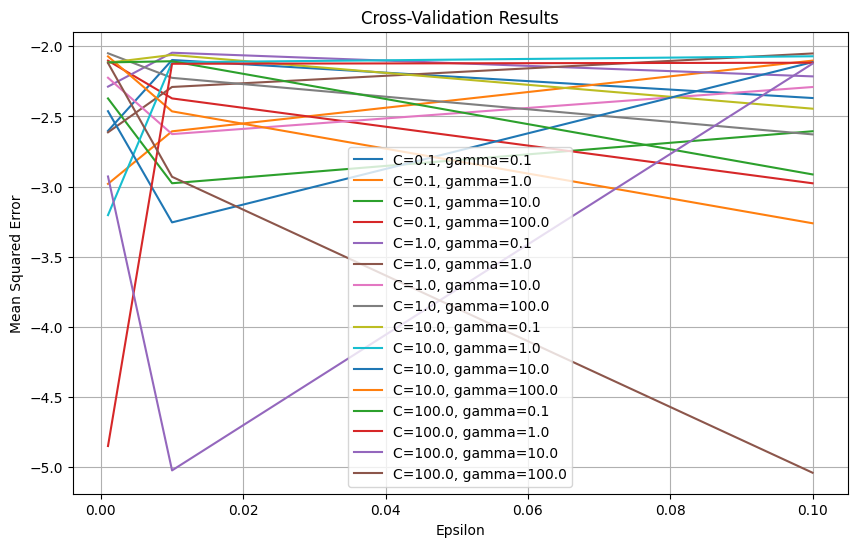

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get the cross-validation results from the GridSearchCV object
cv_results = grid_search.cv_results_

# Extract the mean test scores and parameters from the cross-validation results
mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

# Extract the hyperparameter values for C, gamma, and epsilon
C_values = sorted(np.unique([param['C'] for param in params]))
gamma_values = sorted(np.unique([param['gamma'] for param in params]))
epsilon_values = sorted(np.unique([param['epsilon'] for param in params]))

# Reshape the mean test scores to match the shape of the parameter grids
mean_test_scores = mean_test_scores.reshape(len(C_values), len(gamma_values), len(epsilon_values))

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        plt.plot(epsilon_values, mean_test_scores[i, j], label=f'C={C}, gamma={gamma}')

plt.title('Cross-Validation Results')
plt.xlabel('Epsilon')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
print("Best Estimator Parameters:")
print(grid_search.best_params_)

Best Estimator Parameters:
{'C': 1, 'epsilon': 0.1, 'gamma': 1}


In [26]:
from sklearn.tree import DecisionTreeRegressor
# Choose a model and train it
model2 = DecisionTreeRegressor(max_depth=5)  # Using decision tree regression with a max depth of 5
model2.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse2)

# Make predictions for the next day (assuming you have the features for the next day)
# For example, if the next day's outside temperature is 30 degrees, outside time is 14:00, and inside time is 8:00
next_day_features = scaler.transform([[15, 15]])  # Scale the features
next_day_temperature_inside = model2.predict(next_day_features)
print("Predicted temperature inside for the next day:", next_day_temperature_inside)


Mean Squared Error: 1.8416336967154816
Predicted temperature inside for the next day: [25.54461806]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.linear_model import LinearRegression
# Choose a model and train it
model3 = LinearRegression()  # Using decision tree regression with a max depth of 5
model3.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred3 = model3.predict(X_test_scaled)
mse3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse3)

# Make predictions for the next day (assuming you have the features for the next day)
# For example, if the next day's outside temperature is 30 degrees, outside time is 14:00, and inside time is 8:00
next_day_features = scaler.transform([[15, 15]])  # Scale the features
next_day_temperature_inside = model3.predict(next_day_features)
print("Predicted temperature inside for the next day:", next_day_temperature_inside)


Mean Squared Error: 1.8416336967154816
Predicted temperature inside for the next day: [24.12968186]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
import m2cgen as m2c
import math
code = m2c.export_to_python(model3)

In [29]:
code


'def score(input):\n    return 23.623651960784315 + input[0] * 0.2118175441859958 + input[1] * 0.5489272956132957\n'

In [35]:
scaler.mean_

array([ 5.93181863, 12.78480392])

In [38]:
scaler.scale_

array([6.0335678 , 6.47909644])

In [30]:
code2 = m2c.export_to_python(model2)
code2

'def score(input):\n    if input[1] <= -0.35264237225055695:\n        if input[0] <= -0.3359237313270569:\n            if input[0] <= -0.4187934398651123:\n                if input[0] <= -0.4908900856971741:\n                    if input[1] <= -1.124354898929596:\n                        var0 = 22.318172043010758\n                    else:\n                        var0 = 21.70337500000001\n                else:\n                    if input[0] <= -0.46022829413414:\n                        var0 = 24.588\n                    else:\n                        var0 = 22.648571428571426\n            else:\n                if input[1] <= -1.664553701877594:\n                    if input[0] <= -0.39807601273059845:\n                        var0 = 20.5\n                    else:\n                        var0 = 21.031666666666666\n                else:\n                    if input[0] <= -0.34669679403305054:\n                        var0 = 21.175454545454546\n                    else:\n         

In [31]:
if mse2 > mse3:
  print('yes')
else:
  print('no')

no
